<div style="background-color: #f4f4f9; border: 2px solid #4a90e2; border-radius: 10px; padding: 20px;">
    <h2 style="color: #333; font-family: Verdana, sans-serif; margin-bottom: 10px;">Loan Approval Prediction</h2>
    <p style="color: #555; font-size: 14px; line-height: 1.6; margin-bottom: 15px;">
        This notebook focuses on predicting the approval of loans based on various applicant and loan attributes. 
        We will utilize machine learning model <strong>Gradient Boosting</strong> to develop and evaluate our predictive framework.
    </p>
    <ul style="color: #555; font-size: 14px; line-height: 1.8; padding-left: 20px; list-style-type: disc;">
        <li>🔍 <strong>Data Cleaning & Preprocessing:</strong> Ensuring high-quality data for model training.</li>
        <li>📊 <strong>Model Training & Evaluation:</strong> Building models and assessing their performance.</li>
        <li>📈 <strong>Visualizations:</strong> Compare different columns from dataset</li>
    </ul>
    <h3 style="color: #333; font-family: Verdana, sans-serif; margin-top: 20px;">Steps:</h3>
    <ol style="color: #555; font-size: 14px; line-height: 1.8; padding-left: 20px;">
        <li><strong>Step 1:</strong> Load necessary libraries.</li>
        <li><strong>Step 2:</strong> Read and inspect the dataset.</li>
        <li><strong>Step 3:</strong> Select labels, features, and create dummy variables for categorical data.</li>
        <li><strong>Step 4:</strong> Train the model using <strong>Gradient Boosting</strong> and tune hyperparameters with <strong>GridSearchCV</strong> using parameter grids.</li>
        <li><strong>Step 5:</strong> Submit the predictions and evaluate results.</li>
        <li><strong>Step 6:</strong> Identify and remove outliers to improve model accuracy.</li>
        <li><strong>Step 7:</strong> Create visualizations to analyze and present findings.</li>
    </ol>
</div>


## Step 1: Load necessary libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## Step 2: Read and inspect the dataset

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s4e10/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e10/test.csv")
sub = pd.read_csv("/kaggle/input/playground-series-s4e10/sample_submission.csv")

In [3]:
# train = train.drop('id', axis=1)
train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


## Step 3: Select labels, features, and create dummy variables for categorical data.

In [5]:
# Data preprocessing and encoding
X_cleaned = train.drop(columns=['id','loan_status'])
y_cleaned = train['loan_status']
X_encoded_cleaned = pd.get_dummies(X_cleaned)
test_encoded_cleaned = pd.get_dummies(test)

In [6]:
print("Training columns:", X_encoded_cleaned.columns)
print("Test columns:", test_encoded_cleaned.columns)

Training columns: Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_A',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_N',
       'cb_person_default_on_file_Y'],
      dtype='object')
Test columns: Index(['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownersh

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


## Step 4: Train the model using Gradient Boosting and tune hyperparameters with GridSearchCV using parameter grids


In [9]:
#remove warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_encoded_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Initialize GridSearchCV with AUC as the scoring metric
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, scoring='roc_auc', cv=3)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Extract the best model and score
best_model = grid_search.best_estimator_
best_auc = grid_search.best_score_
print(f"Best AUC Score: {best_auc}")
print(f"Best Parameters: {grid_search.best_params_}")

# Predict the loan status for the test set using the best model
# preds = best_model.predict(test_encoded_cleaned)

# Create the submission DataFrame
# submission = pd.DataFrame({'loan_status': preds})


Best AUC Score: 0.9548761426399043
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


## Step 5: Submit the predictions and evaluate results


In [10]:
# Handle the case where 'id' column is missing by generating a sequential id if necessary
"""if 'id' in test.columns:
    sub['id'] = test['id']
else:
    sub['id'] = np.arange(len(submission))

# Ensure 'id' is the first column
sub = sub[['id', 'loan_status']]

# Save the submission file to CSV
sub.to_csv('submission.csv', index=False)
print("Submission file created successfully.")  """


'if \'id\' in test.columns:\n    sub[\'id\'] = test[\'id\']\nelse:\n    sub[\'id\'] = np.arange(len(submission))\n\n# Ensure \'id\' is the first column\nsub = sub[[\'id\', \'loan_status\']]\n\n# Save the submission file to CSV\nsub.to_csv(\'submission.csv\', index=False)\nprint("Submission file created successfully.")  '

## Step 6: Create visualizations to analyze and present findings


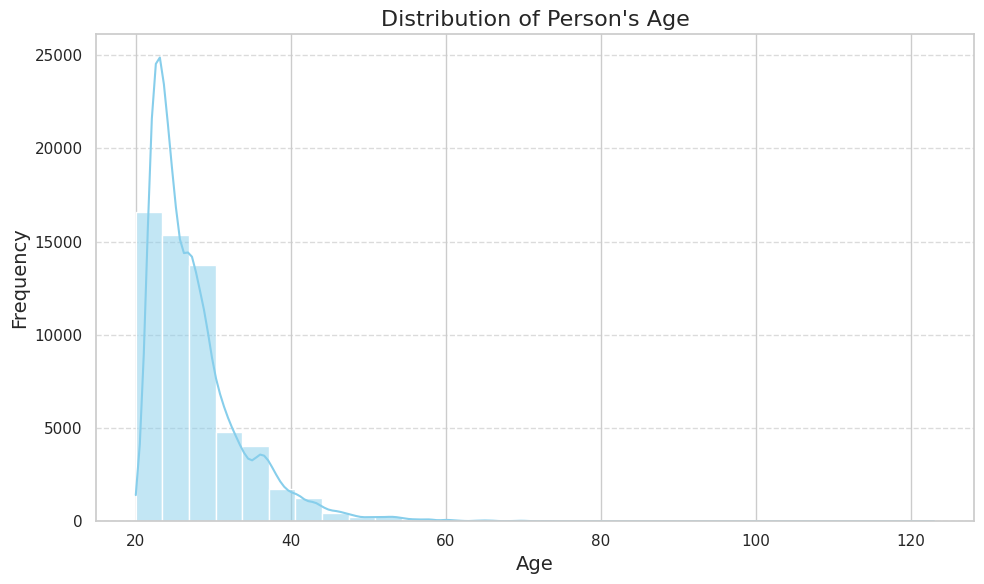

In [11]:
sns.set(style="whitegrid")

# 1. Distribution of Person's Age
plt.figure(figsize=(10, 6))
sns.histplot(train['person_age'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Person's Age", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

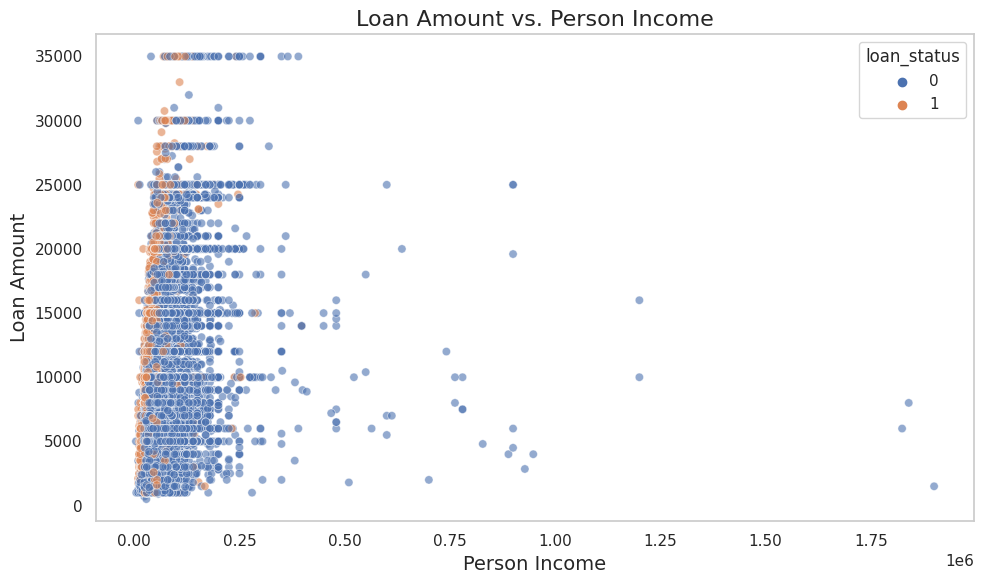

In [12]:
# 2. Loan Amount vs. Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='person_income', y='loan_amnt', data=train, hue='loan_status', alpha=0.6)
plt.title("Loan Amount vs. Person Income", fontsize=16)
plt.xlabel("Person Income", fontsize=14)
plt.ylabel("Loan Amount", fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

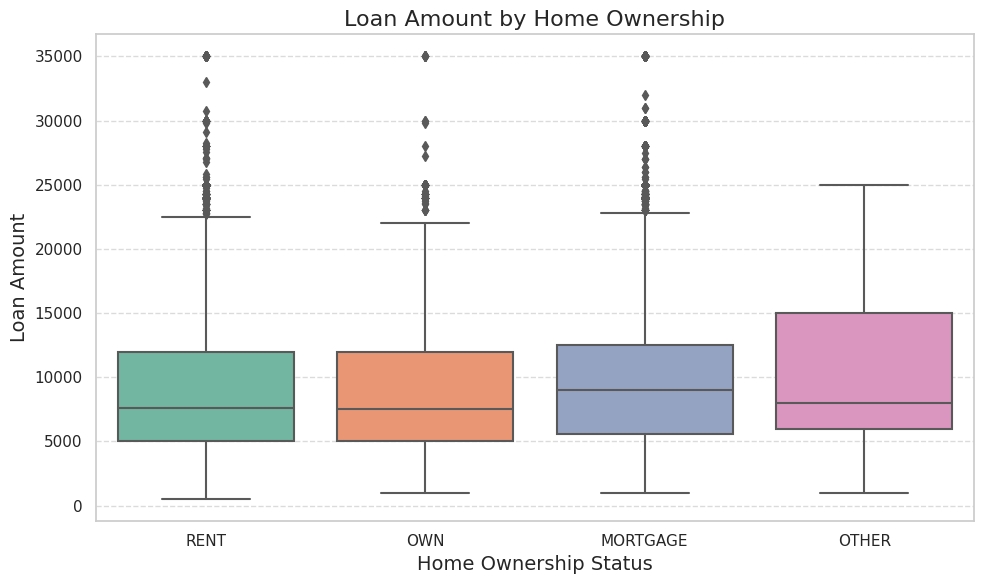

In [13]:
# 4. Loan Amount by Home Ownership
plt.figure(figsize=(10, 6))
sns.boxplot(x='person_home_ownership', y='loan_amnt', data=train, palette='Set2')
plt.title("Loan Amount by Home Ownership", fontsize=16)
plt.xlabel("Home Ownership Status", fontsize=14)
plt.ylabel("Loan Amount", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


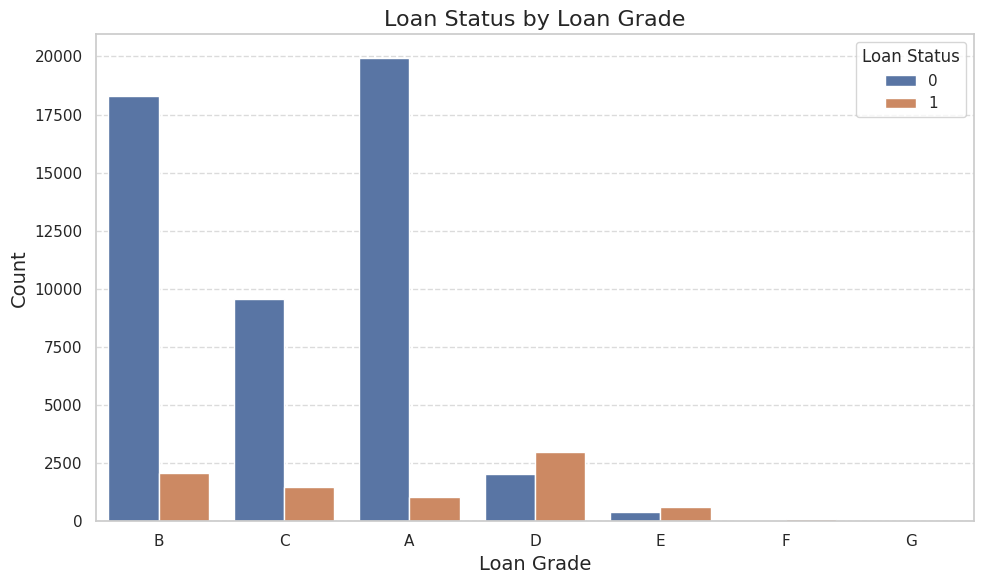

In [14]:
# 5. Loan Status by Loan Grade
plt.figure(figsize=(10, 6))
sns.countplot(x='loan_grade', hue='loan_status', data=train, palette='deep')
plt.title("Loan Status by Loan Grade", fontsize=16)
plt.xlabel("Loan Grade", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title='Loan Status')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


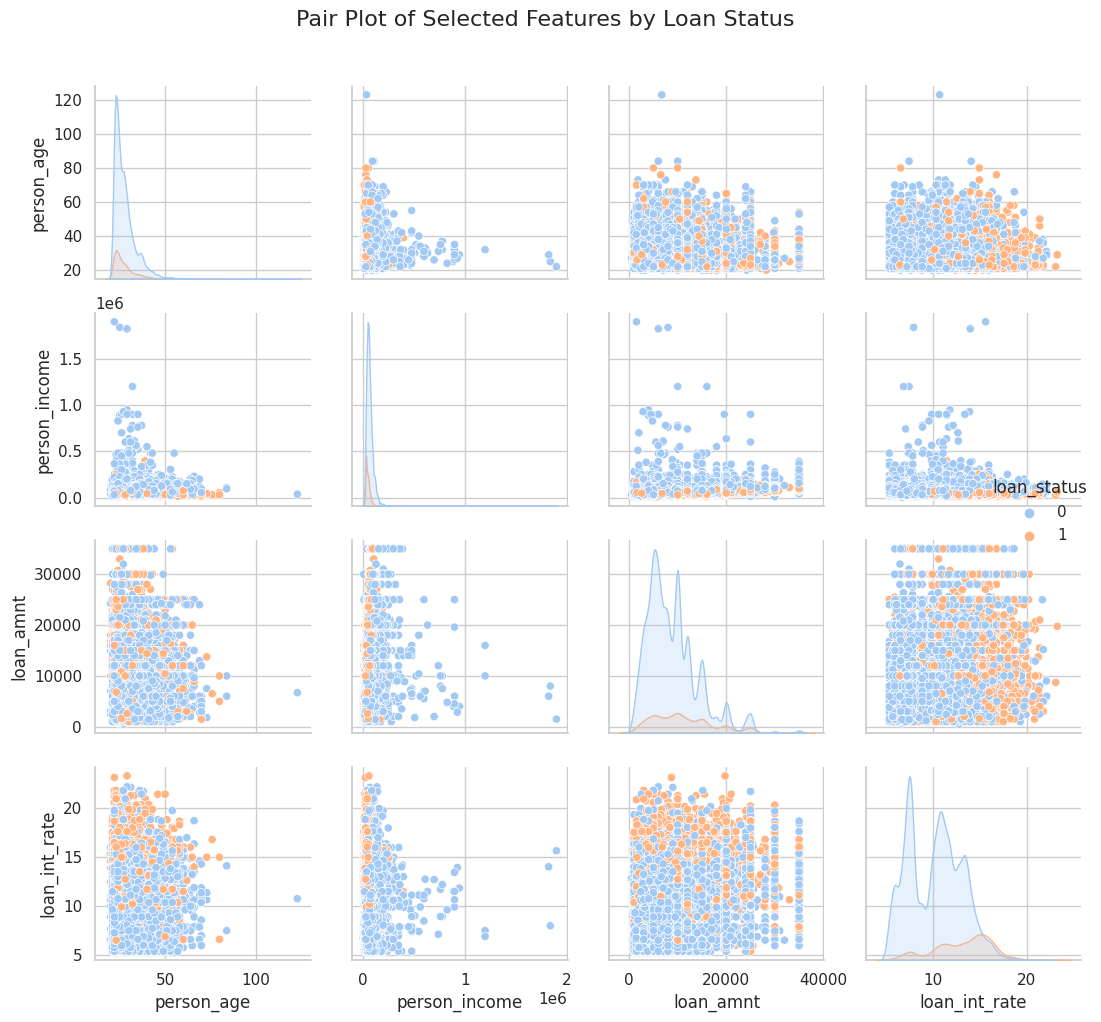

In [15]:
# 2. Pair Plot
sns.pairplot(train, hue='loan_status', vars=['person_age', 'person_income', 'loan_amnt', 'loan_int_rate'], palette='pastel')
plt.suptitle("Pair Plot of Selected Features by Loan Status", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()